<h3>Support Vector Machine(SVM-linear) classification</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/pytz/__init__.py:30: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [2]:
from sklearn.datasets import make_classification
#make classification is a method to generate a categorial dataset(an n-class classification problem)

X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

X

array([[-0.58039899, -1.16378887],
       [ 0.75104047,  1.16253968],
       [-0.86588241, -1.02047129],
       ...,
       [-0.6502463 , -1.25514739],
       [-1.15695321,  0.97631847],
       [-0.68161104,  1.4179739 ]])

In [3]:
y

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,

<Axes: xlabel='feature1', ylabel='feature2'>

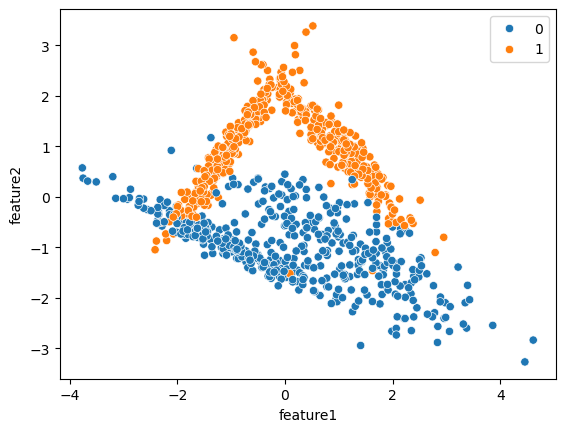

In [4]:
df = pd.DataFrame(X)
df.columns = ["feature1","feature2"]
sb.scatterplot(x=df['feature1'],y=df['feature2'],hue=y,)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)



SVC(kernel='linear')

In [6]:
y_test_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[85  9]
 [ 9 97]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        94
           1       0.92      0.92      0.92       106

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [7]:
svc.predict([[-1.654,-1.874]])

array([0])

<h2>Kernel SVM</h2>

In [8]:
X,y = make_classification(n_samples=700,n_classes=2,n_features=3,n_informative = 3, n_clusters_per_class=3,n_redundant=0)
X

array([[-1.35794428,  1.17320472, -1.47047069],
       [ 0.55491746, -1.40337159, -0.13768271],
       [ 0.8393128 ,  2.56321459,  0.01953305],
       ...,
       [-1.41265164, -1.36018732,  1.32328029],
       [-0.71180895, -1.42847113, -1.32155267],
       [ 0.26861764, -3.02943598, -0.05773193]])

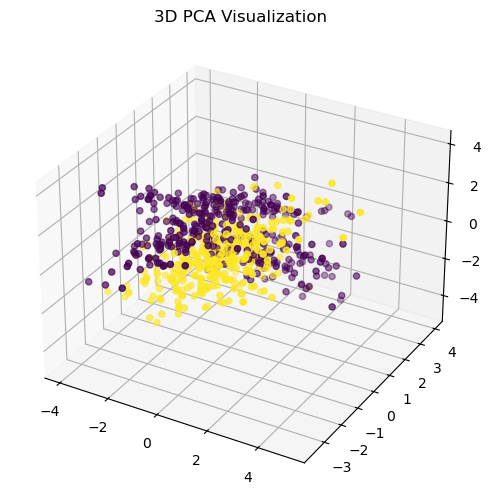

In [15]:
from sklearn.decomposition import PCA

# pca3 = PCA(n_components=3)
# X_3d = pca3.fit_transform(X)               
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title("3D PCA Visualization")
plt.show()

In [10]:
svc = SVC(kernel='rbf', gamma=0.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [11]:
y_test_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[55  8]
 [ 8 69]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        63
           1       0.90      0.90      0.90        77

    accuracy                           0.89       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.89      0.89      0.89       140

